<a href="https://colab.research.google.com/github/simsekergun/ENEE691/blob/main/week06/Multinomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\color{ForestGreen}{\text{An Example of Multinomial Logistic Regression}}$

The **MNIST database** (for further information visit http://yann.lecun.com/exdb/mnist/) consists of $70000$ images of handwritten digits. The digits have been size-normalized and centered in a fixed-size image. Each image has been fitted into a $28\times 28=784$ pixel box. $\textsf{scikit-learn}$ library is automatically equipped with the MNIST dataset through $\textsf{fetch_openml}$. In this classification problem, we treat the $784$ pixel inputs of each image as features and the target variable is the actual digit the image represents, with $10$ distinct classes ($0$, $1$, $2$, $3$, $4$, $5$, $6$, $7$, $8$, $9$).

To implement this classification problem, we put a cap on the number of images we take from MNIST dataset because including all $70000$ images requires a long computation time.

In [1]:
# Importing the libraries that will be used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression   # Importing Logistic Regression from sklearn
import timeit
from sklearn import metrics    # Importing 'metrics' from sklearn
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from sklearn.datasets import fetch_openml   # Importing 'fetch_openml' from sklearn
# Downloading features and target from MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)   

X.shape  # Shape of features as numpy array

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [3]:
# Convert classes from strings to integers 
y = np.array([int(a) for a in y])

y

array([5, 0, 4, ..., 4, 5, 6])

In [4]:
# Constructing the images of MNIST 
def digit_image(sample):
    image = X[sample].reshape(28, 28)  # Reshape the feature 'X' as 28*28 arrays
    fig = plt.figure
    plt.imshow(image, cmap='gray_r')
    plt.show()
    digit = 'Digit Class is: %s' %(y[sample])
    return print(digit)

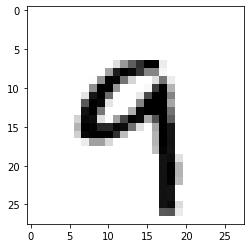

Digit Class is: 9


In [5]:
# Presenting the image of the sample

digit_image(932)

In [6]:
# Let's see how digits are distributed in the first 10000 MNIST images
count = 0
for j in range(10):
    z = [1 if a==j else 0 for a in y[:10000]]
    count += sum(z)
    print('The number of digit %d in the subset is: %d' %(j, sum(z)))
print('Total number of instances in the subset: ', count)

The number of digit 0 in the subset is: 1001
The number of digit 1 in the subset is: 1127
The number of digit 2 in the subset is: 991
The number of digit 3 in the subset is: 1032
The number of digit 4 in the subset is: 980
The number of digit 5 in the subset is: 863
The number of digit 6 in the subset is: 1014
The number of digit 7 in the subset is: 1070
The number of digit 8 in the subset is: 944
The number of digit 9 in the subset is: 978
Total number of instances in the subset:  10000


In [7]:
# Dividing the features and the target variable into the train and test subsets 
cap = 10000

XX = X[:cap]
yy = y[:cap]

X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

In [8]:
logreg = LogisticRegression(penalty = 'none', max_iter = 10000) # Instantiating logistic regression 

start = timeit.default_timer()
logreg.fit(X_train, y_train)  # Fitting the train data to 'logreg'
stop = timeit.default_timer()

print('Training time: %s sec' %(stop-start))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Training time: 5.147924705999998 sec


In [9]:
# Predicted class for the test subset through logistic regression 

y_train_pred_prob = logreg.predict_proba(X_train)  # Calculating probabilities of the two classes in train subset
y_test_pred_prob = logreg.predict_proba(X_test)    # Calculating probabilities of the two classes in test subset

# Presenting the probabilities for the 1st 10 instances in train subset

print('Train predictions for probabilities:\n\n', y_train_pred_prob[:3],'\n')

# Presenting the probabilities for the 1st 10 instances in test subset

print('Test predictions for probabilities:\n\n', y_test_pred_prob[:3])

Train predictions for probabilities:

 [[1.69507179e-293 0.00000000e+000 6.92715283e-250 1.00000000e+000
  3.89164019e-228 1.05624564e-138 0.00000000e+000 9.73070693e-136
  5.04841746e-095 1.06575696e-202]
 [1.44817077e-266 8.61401449e-016 1.41692955e-228 4.03225260e-047
  1.17044334e-090 2.79039857e-017 1.08540454e-043 2.40609970e-321
  1.00000000e+000 1.23004171e-159]
 [0.00000000e+000 1.00000000e+000 8.55305282e-147 9.89932334e-176
  2.23806783e-118 0.00000000e+000 7.89016382e-294 4.73977397e-256
  8.50554093e-180 2.06794985e-151]] 

Test predictions for probabilities:

 [[0.00000000e+000 0.00000000e+000 0.00000000e+000 8.24930375e-189
  1.85335396e-226 2.69037302e-278 0.00000000e+000 1.00000000e+000
  1.55517135e-198 9.71626423e-169]
 [4.42221585e-300 0.00000000e+000 4.26449128e-196 0.00000000e+000
  1.00000000e+000 5.03281134e-250 1.77681124e-216 1.01711547e-202
  4.85116914e-226 3.53569150e-093]
 [0.00000000e+000 1.00000000e+000 1.45427424e-120 5.04469082e-098
  2.68454185e-251 2

In [10]:
y_train_pred = y_train_pred_prob.argmax(axis=1)  # Finding the predicted class for train predictions
y_test_pred = y_test_pred_prob.argmax(axis=1)  # Finding the predicted class for test predictions

# Presenting the predicted classes for the 1st 10 instances of train
print('Predicted class for train: ', y_train_pred[:10],'\n')     

# Presenting the predicted classes for the 1st 10 instances of test
print('Predicted class for train: ', y_test_pred[:10]) 

Predicted class for train:  [3 8 1 8 9 1 4 7 3 3] 

Predicted class for train:  [7 4 1 2 8 6 1 9 2 4]


In [11]:
# Calculating the train and test accuracy scores of the model
train_score = metrics.accuracy_score(y_train, y_train_pred) # train accuracy

test_score = metrics.accuracy_score(y_test, y_test_pred)    # test accuracy

print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  1.0 

Test accuracy score of the model is  0.86833


In [12]:
# Instantiating logistic regression with 'L2' regularization
logreg_pen = LogisticRegression(penalty = 'l2', max_iter = 10000, C=10e-7) # Including a strong L2 penalty

start = timeit.default_timer()
logreg_pen.fit(X_train, y_train)  # Fitting the train data to 'logreg'
stop = timeit.default_timer()

print('Training time: %s sec' %(stop-start))

Training time: 7.436060021000003 sec


In [13]:
# Finding the predicted class for the train and test subsets

y_train_pred = logreg_pen.predict_proba(X_train).argmax(axis=1) 
y_test_pred = logreg_pen.predict_proba(X_test).argmax(axis=1) 

In [14]:
train_score = metrics.accuracy_score(y_train, y_train_pred) # train accuracy

test_score = metrics.accuracy_score(y_test, y_test_pred)    # test accuracy

print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.93686 

Test accuracy score of the model is  0.91833


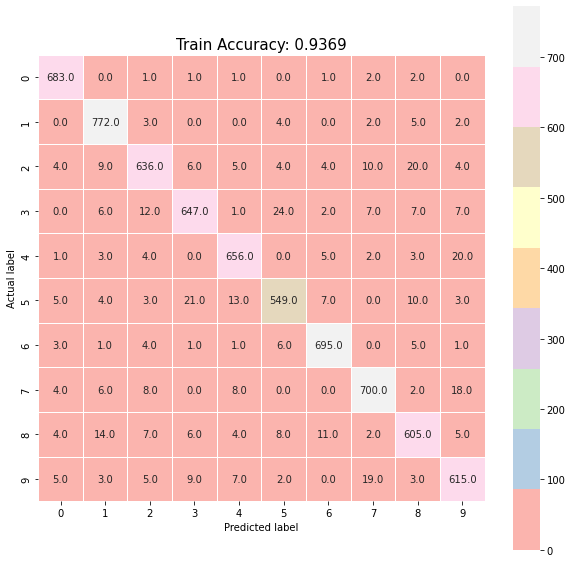

Classification Report for the Train Subset: 

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       691
           1       0.94      0.98      0.96       788
           2       0.93      0.91      0.92       702
           3       0.94      0.91      0.92       713
           4       0.94      0.95      0.94       694
           5       0.92      0.89      0.91       615
           6       0.96      0.97      0.96       717
           7       0.94      0.94      0.94       746
           8       0.91      0.91      0.91       666
           9       0.91      0.92      0.92       668

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000



In [15]:
# Computing the confusion matrix for the train subset
train_c_matrix = confusion_matrix(y_train, y_train_pred)  # Compute the train confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Print the train classification report

print('Classification Report for the Train Subset: \n\n', classification_report(y_train, y_train_pred))

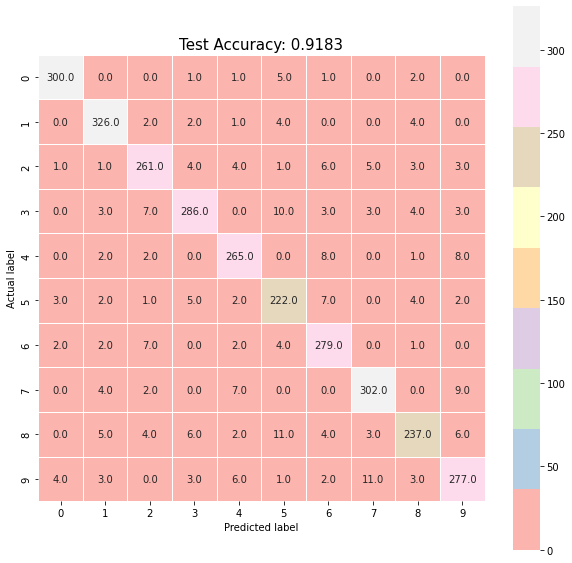

Classification Report for the Test Subset: 

               precision    recall  f1-score   support

           0       0.97      0.97      0.97       310
           1       0.94      0.96      0.95       339
           2       0.91      0.90      0.91       289
           3       0.93      0.90      0.91       319
           4       0.91      0.93      0.92       286
           5       0.86      0.90      0.88       248
           6       0.90      0.94      0.92       297
           7       0.93      0.93      0.93       324
           8       0.92      0.85      0.88       278
           9       0.90      0.89      0.90       310

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [16]:
# Computing the confusion matrix for the test subset

test_c_matrix = confusion_matrix(y_test, y_test_pred)  # Compute the test confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Print the train classification report

print('Classification Report for the Test Subset: \n\n', classification_report(y_test, y_test_pred))